In [22]:
import pandas as pd

In [24]:
url = 'https://data.cityofnewyork.us/api/views/7yay-m4ae/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)


department_name = "Department of Education"  
dept_df = df[df['AGENCY NAME'] == department_name]

dept_df.head()

,PUBLICATION DATE,FISCAL YEAR,AGENCY CODE,AGENCY NAME,ALL FUNDS,CITY FUND,REMARK
962,20171201,2017,040,Department of Education,23508038,11116952,NaN
991,20171130,2009,040,Department of Education,17903053,7259066,NaN
1067,20171130,2005,040,Department of Education,13871184,5605073,NaN
1076,20171130,2008,040,Department of Education,16977034,6997793,NaN
1088,20171130,2015,040,Department of Education,20999365,9739990,NaN


In [25]:
dept_df['Variance'] = dept_df['ALL FUNDS'] - dept_df['CITY FUND']

spending_patterns = dept_df.groupby('FISCAL YEAR').agg({
    'ALL FUNDS': 'sum',
    'CITY FUND': 'sum',
    'Variance': 'sum'
})

print(spending_patterns)


             ALL FUNDS  CITY FUND  Variance
FISCAL YEAR                                
2002          11883255    4784694   7098561
2003          12780991    5103243   7677748
2004          13148112    5464382   7683730
2005          13871184    5605073   8266111
2006          14959318    6306405   8652913
2007          15884401    6779894   9104507
2008          16977034    6997793   9979241
2009          17903053    7259066  10643987
2010          18498505    7140162  11358343
2011          18938899    7737414  11201485
2012          19283256    9075717  10207539
2013          19232415    9080876  10151539
2014          20085287    9546810  10538477
2015          20999365    9739990  11259375
2016          22421560   10607314  11814246
2017          23508038   11116952  12391086


C:\Users\Devanshu Katiyar\AppData\Local\Temp\ipykernel_17984\1119485518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_df['Variance'] = dept_df['ALL FUNDS'] - dept_df['CITY FUND']


In [27]:
high_variance_areas = dept_df.sort_values(by='Variance', ascending=False).head(10)
print("Top 10 Areas with High Variance:")
print(high_variance_areas[['AGENCY NAME', 'ALL FUNDS', 'CITY FUND', 'Variance']])


Top 10 Areas with High Variance:
                  AGENCY NAME  ALL FUNDS  CITY FUND  Variance
962   Department of Education   23508038   11116952  12391086
1379  Department of Education   22421560   10607314  11814246
1402  Department of Education   18498505    7140162  11358343
1088  Department of Education   20999365    9739990  11259375
1129  Department of Education   18938899    7737414  11201485
991   Department of Education   17903053    7259066  10643987
1229  Department of Education   20085287    9546810  10538477
1412  Department of Education   19283256    9075717  10207539
1261  Department of Education   19232415    9080876  10151539
1076  Department of Education   16977034    6997793   9979241


In [28]:
reallocation_suggestions = high_variance_areas[['AGENCY NAME', 'Variance']].copy()
reallocation_suggestions['Suggested Reallocation'] = reallocation_suggestions['Variance'] * 0.5  # Example calculation

print("Reallocation Suggestions:")
print(reallocation_suggestions)


Reallocation Suggestions:
                  AGENCY NAME  Variance  Suggested Reallocation
962   Department of Education  12391086               6195543.0
1379  Department of Education  11814246               5907123.0
1402  Department of Education  11358343               5679171.5
1088  Department of Education  11259375               5629687.5
1129  Department of Education  11201485               5600742.5
991   Department of Education  10643987               5321993.5
1229  Department of Education  10538477               5269238.5
1412  Department of Education  10207539               5103769.5
1261  Department of Education  10151539               5075769.5
1076  Department of Education   9979241               4989620.5


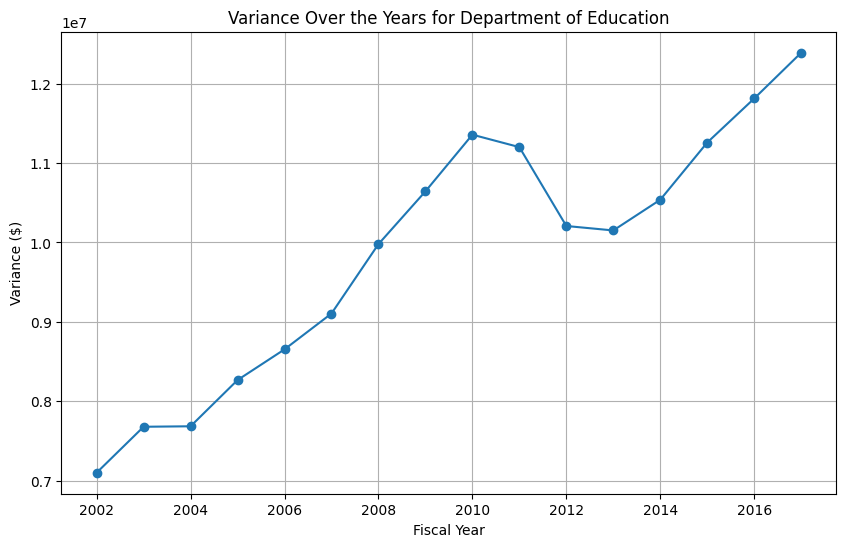

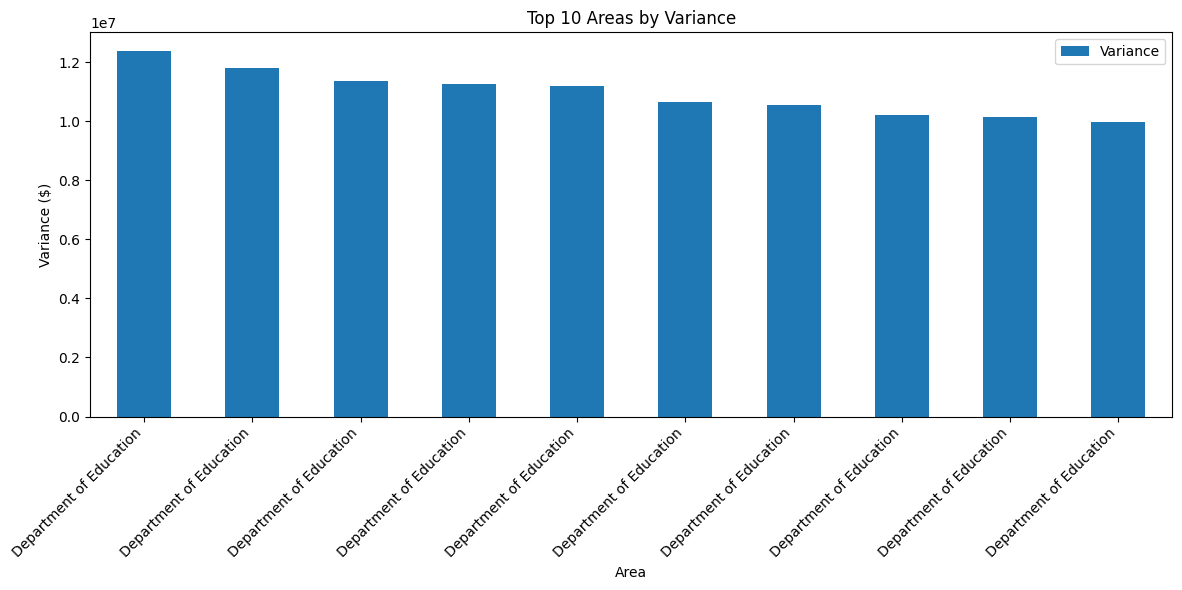

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(spending_patterns.index, spending_patterns['Variance'], marker='o')
plt.title(f'Variance Over the Years for {department_name}')
plt.xlabel('Fiscal Year')
plt.ylabel('Variance ($)')
plt.grid(True)
plt.show()

high_variance_areas.plot(kind='bar', x='AGENCY NAME', y='Variance', figsize=(12, 6))
plt.title('Top 10 Areas by Variance')
plt.xlabel('Area')
plt.ylabel('Variance ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:

report_summary = {
    'Department': department_name,
    'Total Budget': dept_df['ALL FUNDS'].sum(),
    'Total Actual Spending': dept_df['CITY FUND'].sum(),
    'Total Variance': dept_df['Variance'].sum(),
    'Top Cost Savings Areas': high_variance_areas[['AGENCY NAME', 'Variance']].to_dict('records'),
    'Reallocation Suggestions': reallocation_suggestions.to_dict('records')
}


report_summary


{'Department': 'Department of Education',
 'Total Budget': 280374673,
 'Total Actual Spending': 122345785,
 'Total Variance': 158028888,
 'Top Cost Savings Areas': [{'AGENCY NAME': 'Department of Education',
   'Variance': 12391086},
  {'AGENCY NAME': 'Department of Education', 'Variance': 11814246},
  {'AGENCY NAME': 'Department of Education', 'Variance': 11358343},
  {'AGENCY NAME': 'Department of Education', 'Variance': 11259375},
  {'AGENCY NAME': 'Department of Education', 'Variance': 11201485},
  {'AGENCY NAME': 'Department of Education', 'Variance': 10643987},
  {'AGENCY NAME': 'Department of Education', 'Variance': 10538477},
  {'AGENCY NAME': 'Department of Education', 'Variance': 10207539},
  {'AGENCY NAME': 'Department of Education', 'Variance': 10151539},
  {'AGENCY NAME': 'Department of Education', 'Variance': 9979241}],
 'Reallocation Suggestions': [{'AGENCY NAME': 'Department of Education',
   'Variance': 12391086,
   'Suggested Reallocation': 6195543.0},
  {'AGENCY NAME